In [6]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

from osgeo import gdal, osr
from gdalconst import *

('cols of mola is: ', 1440)
('rows of mola is: ', 720)


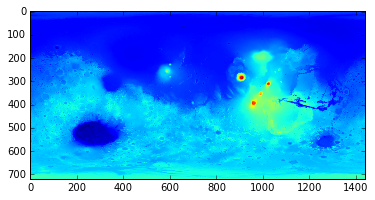

In [7]:
mtopo = gdal.Open('megt90n000cb.lbl')


# one should firt get an array out
mtopoarray = np.array(mtopo.GetRasterBand(1).ReadAsArray())

# then we show the image
plt.imshow(mtopoarray)

cols = mtopo.RasterXSize 
rows = mtopo.RasterYSize
print("cols of mola is: ", cols)
print("rows of mola is: ", rows)

('min of mola is: ', -8068)
('max of mola is: ', 21134)


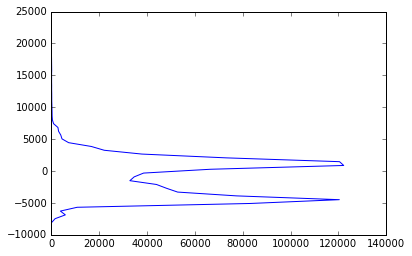

In [8]:
minmars = np.nanmin(mtopoarray)
maxmars = np.nanmax(mtopoarray)
print("min of mola is: ", minmars)
print("max of mola is: ", maxmars)

# histogram
binsmars = np.linspace(minmars, maxmars, 50)

histmars, binsmars = np.histogram(mtopoarray, binsmars)
plt.plot( histmars, binsmars[:-1] )
plt.show()

In [9]:
#try some bokeh plotting using numpy array
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [10]:
p = figure(title="MOLA", x_range=(0,360), y_range=(-90,90), plot_width=720, plot_height=360)
#needed to flip array for some reason (ud or up-down)
p.image(image=[np.flipud(mtopoarray)], x=0, y=-90, dw=360, dh=180, palette="Spectral11")
show(p)

In [11]:
# test R
import rpy2
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects

In [12]:
# from: https://sites.google.com/site/aslugsguidetopython/data-analysis/pandas/calling-r-from-python
robjects.r('x=c()')
robjects.r('x[1]=22')
robjects.r('x[2]=44')
print(robjects.r('x'))
type(robjects.r('x'))

[ 22.  44.]


numpy.ndarray

In [39]:
#convert from numpy to R
from rpy2.robjects.numpy2ri import numpy2ri
rpy2.robjects.numpy2ri.activate()

#convert image array from numpy
rtopoarray = numpy2ri(mtopoarray)
type(rtopoarray)

#do something with R array - plots stats per image image column (sample)
print robjects.r.summary(rtopoarray)


       V1              V2              V3              V4       

 Min.   :-5419   Min.   :-5336   Min.   :-4857   Min.   :-4895  

 1st Qu.:-3265   1st Qu.:-3260   1st Qu.:-3260   1st Qu.:-3260  

 Median :-1289   Median :-1240   Median :-1211   Median :-1182  

 Mean   :-1080   Mean   :-1061   Mean   :-1075   Mean   :-1081  

 3rd Qu.: 1379   3rd Qu.: 1399   3rd Qu.: 1393   3rd Qu.: 1334  

 Max.   : 4716   Max.   : 4710   Max.   : 4705   Max.   : 4704  

       V5              V6              V7              V8       

 Min.   :-4946   Min.   :-4970   Min.   :-4978   Min.   :-4978  

 1st Qu.:-3296   1st Qu.:-3318   1st Qu.:-3358   1st Qu.:-3337  

 Median :-1216   Median :-1166   Median :-1176   Median :-1160  

 Mean   :-1089   Mean   :-1094   Mean   :-1103   Mean   :-1101  

 3rd Qu.: 1308   3rd Qu.: 1282   3rd Qu.: 1240   3rd Qu.: 1246  

 Max.   : 4702   Max.   : 4699   Max.   : 4695   Max.   : 4691  

       V9             V10             V11             V12       

 Min.   :-

In [ ]:
#Try some R plotting using ggplot2 - not working


In [15]:
#Try some rbokeh plotting - not working
rbokeh = importr('rbokeh')